## Breast Cancer Classification
## Vidul Garg

In [526]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

In [527]:
df=pd.read_csv(r'D:\MachineLearning\CodeClauseInternship\BreastData.csv')
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [528]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [529]:
df.drop("Unnamed: 32",inplace=True, axis=1)

In [530]:
df.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [531]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

## Plotting for 'Diagnosis':

([<matplotlib.axis.XTick at 0x1a25e8b12d0>,
 [Text(0, 0, 'Malignant'), Text(1, 0, 'Benign')])

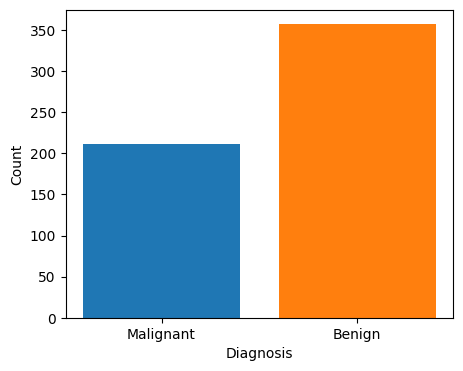

In [532]:
plt.figure(figsize=(5,4))
plt.bar([0],height=len(df[df["diagnosis"]=='M']))
plt.bar([1],height=len(df[df["diagnosis"]=='B']))

plt.xlabel("Diagnosis")
plt.ylabel("Count")

plt.xticks(np.arange(2), ('Malignant', 'Benign'))   # to label the bars

> People with 'Benign' diagnosis are more !!

In [533]:
# sns.pairplot(df,hue='diagnosis')

## Encoding:

In [534]:
df["diagnosis"].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [535]:
df["diagnosis"]=df["diagnosis"].replace({"M":0,"B":1})

## Checking Correlation using heatmap:

<Axes: >

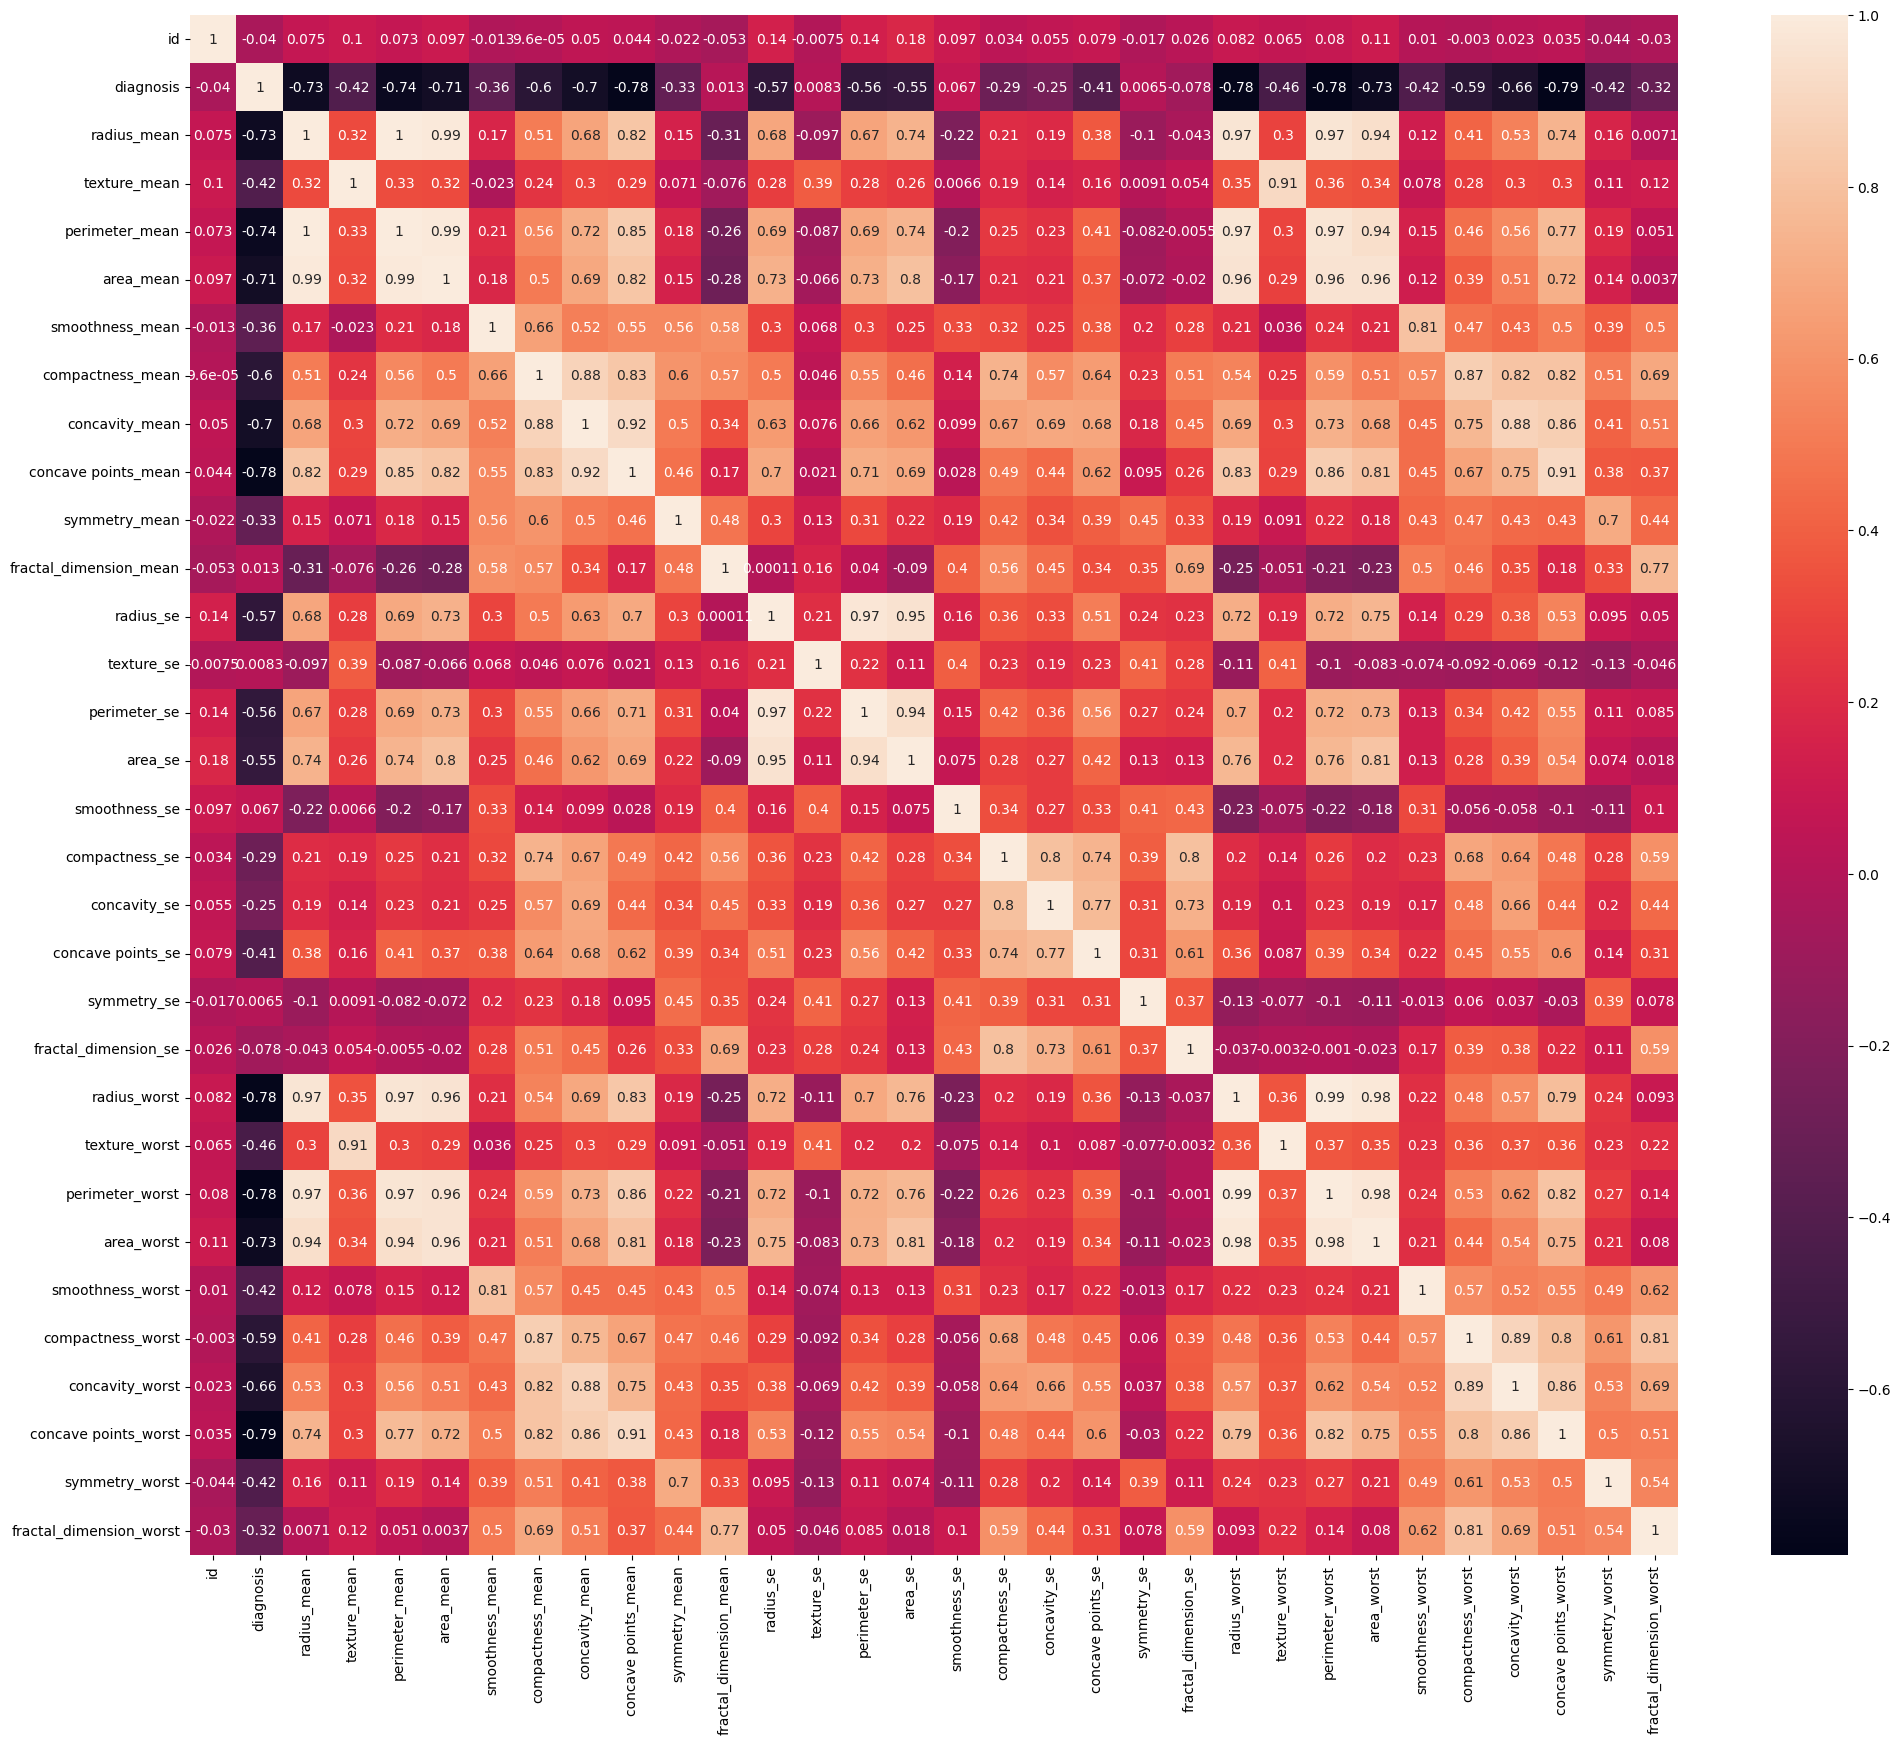

In [536]:
plt.figure(figsize=(24,20))
cor=df.corr()
sns.heatmap(cor,annot=True)

In [537]:
# To remove correlated columns:
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()   # correlation matrix
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if(abs(corr_matrix.iloc[i,j])>=threshold):
                col_corr.add(corr_matrix.columns[i])
                print(df.columns[i],"----",df.columns[j],"----->",corr_matrix.iloc[i,j])  
    return col_corr

In [538]:
corr_features=correlation(df,0.90)    # checking for 90%

perimeter_mean ---- radius_mean -----> 0.9978552814938109
area_mean ---- radius_mean -----> 0.9873571700566127
area_mean ---- perimeter_mean -----> 0.9865068039913907
concave points_mean ---- concavity_mean -----> 0.9213910263788588
perimeter_se ---- radius_se -----> 0.9727936770160764
area_se ---- radius_se -----> 0.951830112110991
area_se ---- perimeter_se -----> 0.9376554069544157
radius_worst ---- radius_mean -----> 0.9695389726112055
radius_worst ---- perimeter_mean -----> 0.9694763634663146
radius_worst ---- area_mean -----> 0.9627460860470841
texture_worst ---- texture_mean -----> 0.912044588840421
perimeter_worst ---- radius_mean -----> 0.9651365139559871
perimeter_worst ---- perimeter_mean -----> 0.9703868870426394
perimeter_worst ---- area_mean -----> 0.9591195743552645
perimeter_worst ---- radius_worst -----> 0.993707916102949
area_worst ---- radius_mean -----> 0.9410824595860461
area_worst ---- perimeter_mean -----> 0.9415498080023068
area_worst ---- area_mean -----> 0.9592

> There is a presence of multicollinearity between some of our variables !!

> We will drop all "worst" columns from our dataset

> For example--> we can see 'perimeter_mean', 'area_mean' and 'radius_mean' are correlated to each other so we'll keep only one of them !!

In [539]:
# Removing Unnecessary columns
l=['perimeter_mean','area_mean','concave points_mean','perimeter_se','area_se','radius_worst','texture_worst','perimeter_worst','area_worst']
df.drop(l,axis=1,inplace=True)

## Again check heatmap

<Axes: >

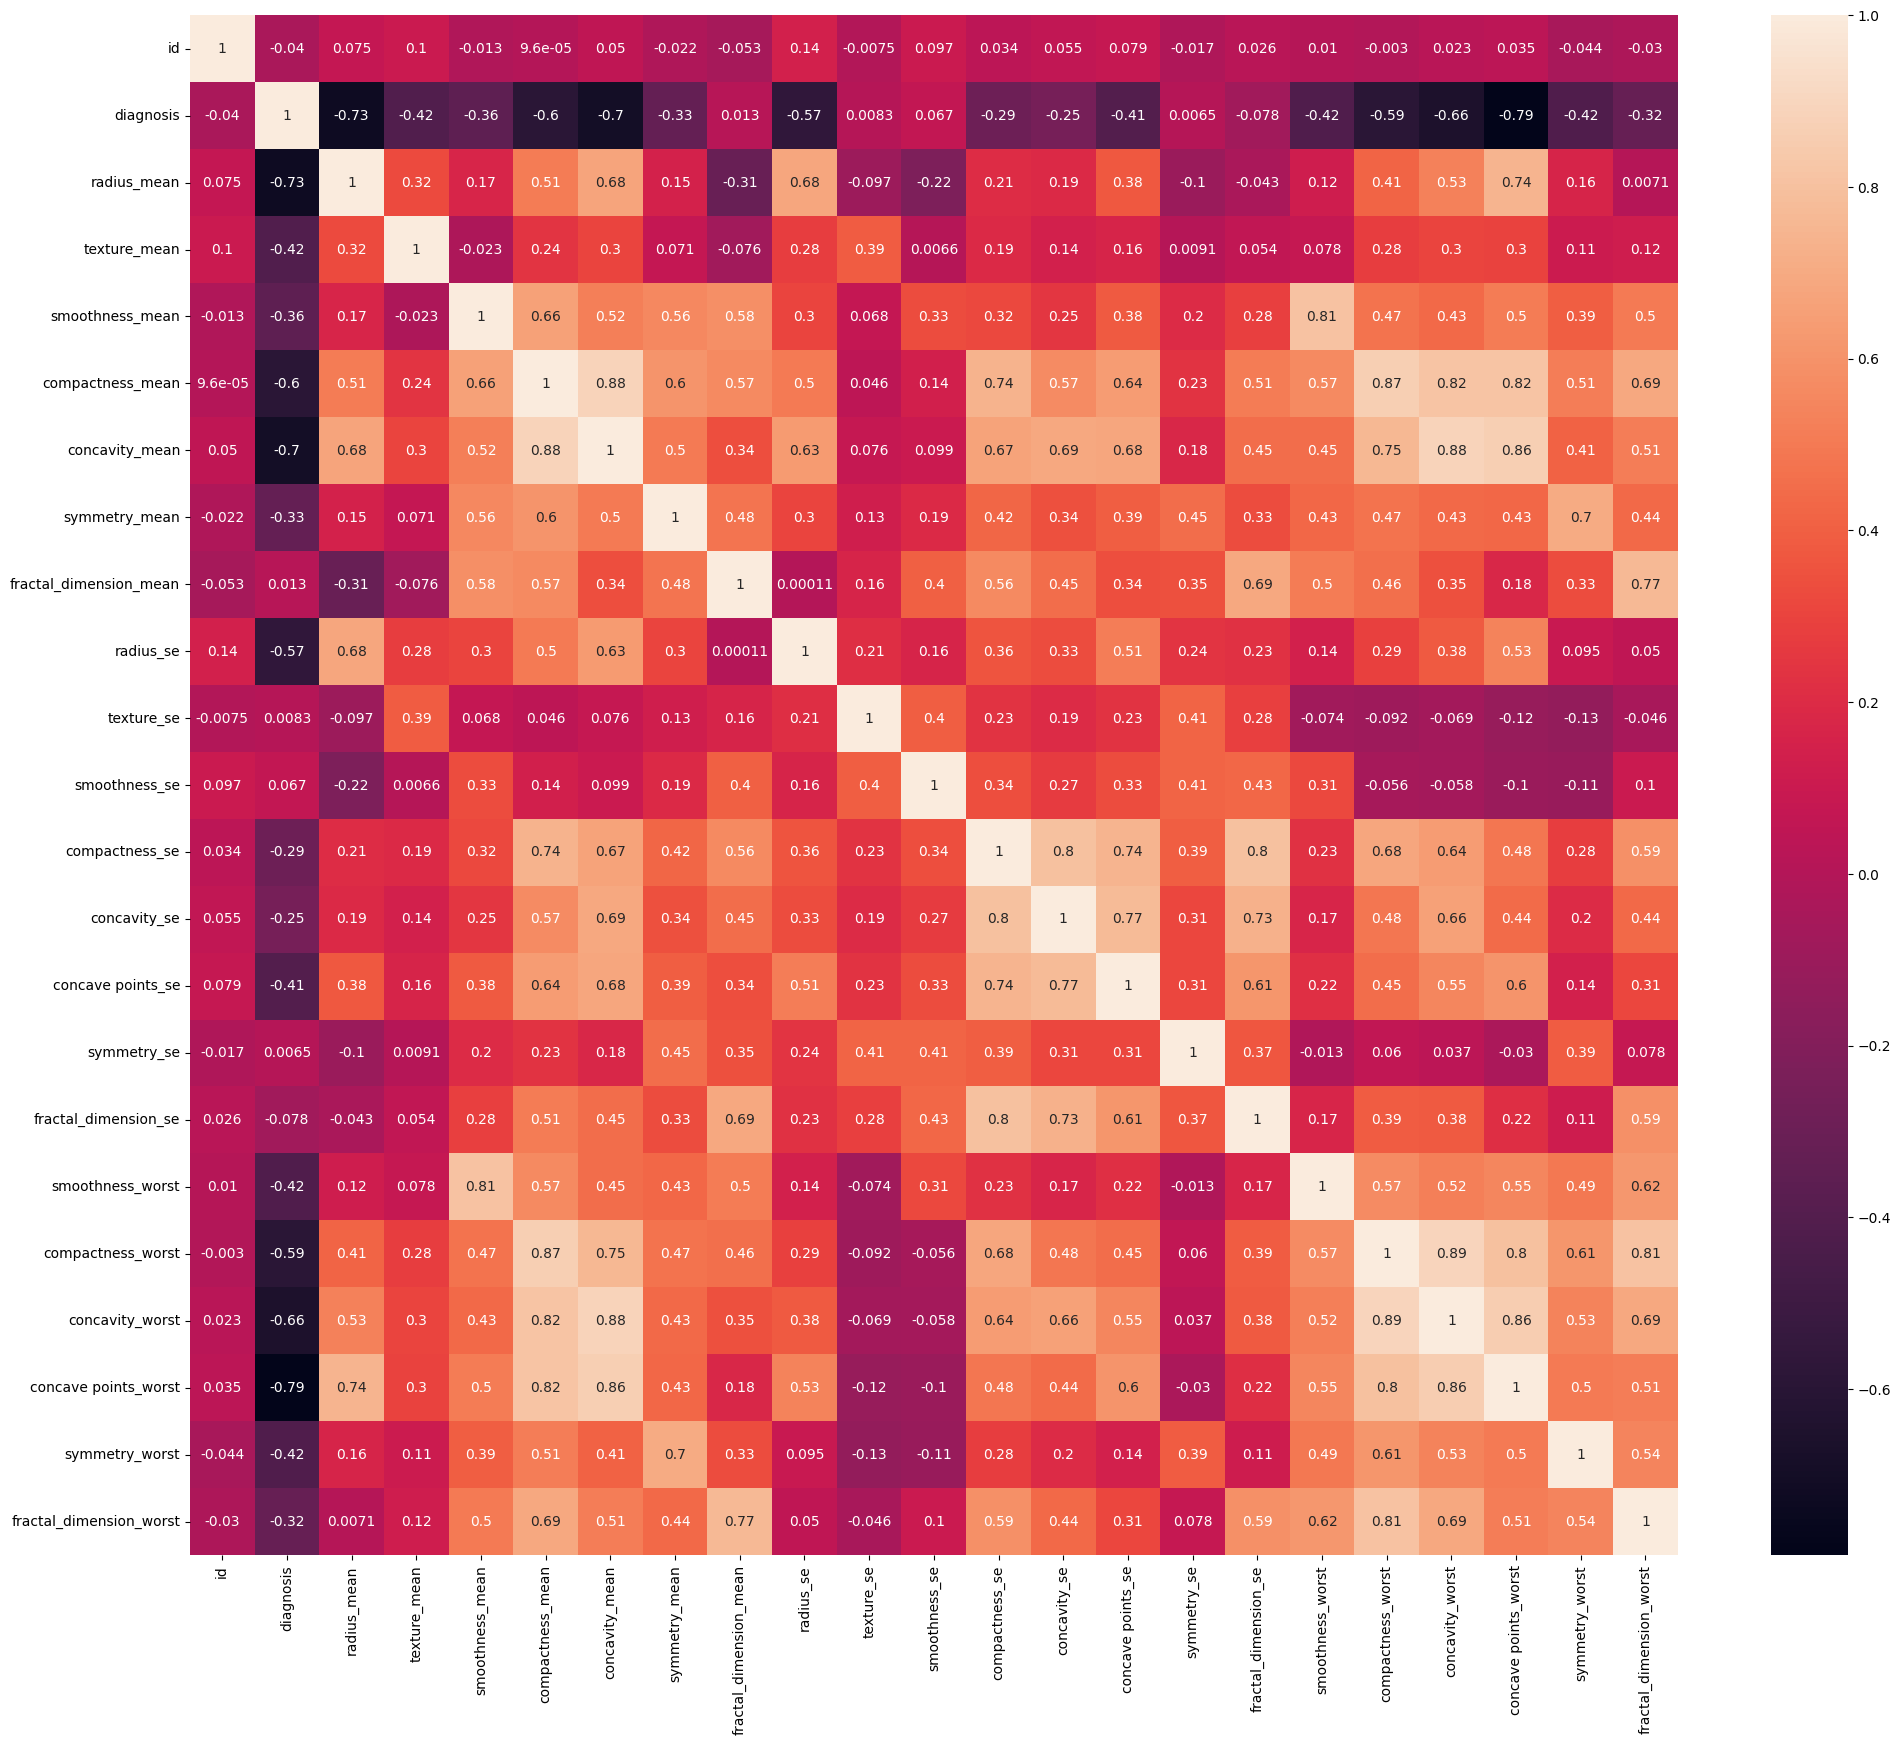

In [540]:
plt.figure(figsize=(24,20))
cor=df.corr()
sns.heatmap(cor,annot=True)

## Checking Outliers:

In [541]:
print(df.columns)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'concavity_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'concave points_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')


Text(0.5, 1.0, 'Box Plot of All Columns')

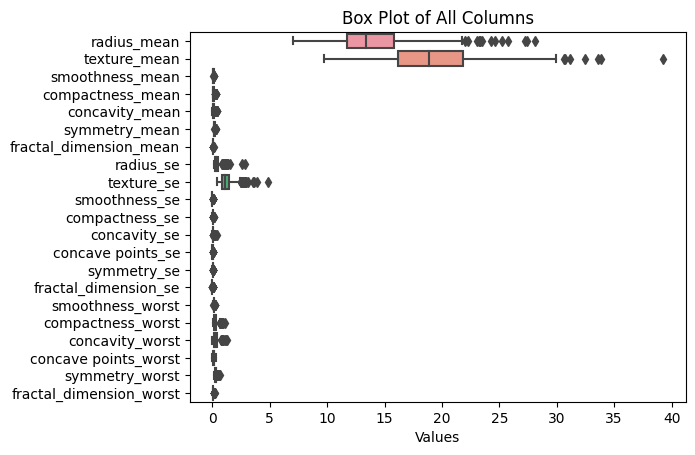

In [542]:
l=['radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'concavity_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'concave points_worst', 'symmetry_worst',
       'fractal_dimension_worst']

sns.boxplot(data=df[l], orient='h')  # 'orient' is set to 'h' for horizontal box plots

plt.xlabel('Values')
plt.title('Box Plot of All Columns')

> Ouliers exist !!!

## Finding Quantiles and removing outliers:

In [543]:
l=['radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'concavity_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'concave points_worst', 'symmetry_worst',
       'fractal_dimension_worst']
for i in l:
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    iqr=q3-q1
    upperL=q3+1.5*iqr
    lowerL=q1-1.5*iqr
    df[i]=np.where(df[i]>upperL,upperL,np.where(df[i]<lowerL,lowerL,df[i]))

Text(0.5, 1.0, 'Box Plot of All Columns')

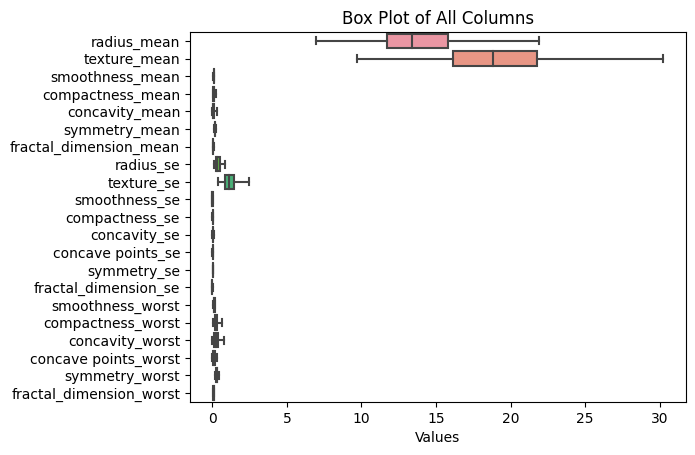

In [544]:
l=['radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'concavity_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'concave points_worst', 'symmetry_worst',
       'fractal_dimension_worst']

sns.boxplot(data=df[l], orient='h')  # 'orient' is set to 'h' for horizontal box plots

plt.xlabel('Values')
plt.title('Box Plot of All Columns')

In [545]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   symmetry_mean            569 non-null    float64
 8   fractal_dimension_mean   569 non-null    float64
 9   radius_se                569 non-null    float64
 10  texture_se               569 non-null    float64
 11  smoothness_se            569 non-null    float64
 12  compactness_se           569 non-null    float64
 13  concavity_se             569 non-null    float64
 14  concave points_se        5

## Splitting the data into dependent and independent variables:

In [546]:
x=df.iloc[:,2:23]
# y=df.iloc[:,1:2]
y=df["diagnosis"]

In [547]:
print(x.info())
print(y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   smoothness_mean          569 non-null    float64
 3   compactness_mean         569 non-null    float64
 4   concavity_mean           569 non-null    float64
 5   symmetry_mean            569 non-null    float64
 6   fractal_dimension_mean   569 non-null    float64
 7   radius_se                569 non-null    float64
 8   texture_se               569 non-null    float64
 9   smoothness_se            569 non-null    float64
 10  compactness_se           569 non-null    float64
 11  concavity_se             569 non-null    float64
 12  concave points_se        569 non-null    float64
 13  symmetry_se              569 non-null    float64
 14  fractal_dimension_se     5

In [548]:
x.iloc[20]

radius_mean                13.080000
texture_mean               15.710000
smoothness_mean             0.107500
compactness_mean            0.127000
concavity_mean              0.045680
symmetry_mean               0.196700
fractal_dimension_mean      0.068110
radius_se                   0.185200
texture_se                  0.747700
smoothness_se               0.004097
compactness_se              0.018980
concavity_se                0.016980
concave points_se           0.006490
symmetry_se                 0.016780
fractal_dimension_se        0.002425
smoothness_worst            0.131200
compactness_worst           0.277600
concavity_worst             0.189000
concave points_worst        0.072830
symmetry_worst              0.318400
fractal_dimension_worst     0.081830
Name: 20, dtype: float64

In [549]:
print(list(x.columns))

['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


## Feature Scaling:

In [550]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(x)
x=scaler.transform(x)
x=pd.DataFrame(x)
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       569 non-null    float64
 1   1       569 non-null    float64
 2   2       569 non-null    float64
 3   3       569 non-null    float64
 4   4       569 non-null    float64
 5   5       569 non-null    float64
 6   6       569 non-null    float64
 7   7       569 non-null    float64
 8   8       569 non-null    float64
 9   9       569 non-null    float64
 10  10      569 non-null    float64
 11  11      569 non-null    float64
 12  12      569 non-null    float64
 13  13      569 non-null    float64
 14  14      569 non-null    float64
 15  15      569 non-null    float64
 16  16      569 non-null    float64
 17  17      569 non-null    float64
 18  18      569 non-null    float64
 19  19      569 non-null    float64
 20  20      569 non-null    float64
dtypes: float64(21)
memory usage: 93.5 KB


In [551]:
x.head(3)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.737918,0.032627,0.798006,1.000000,1.000000,0.966716,0.998611,1.000000,0.262832,0.429967,...,0.651352,0.626827,0.788803,0.743273,0.762755,1.000000,0.906302,0.912027,1.000000,0.939532
1,0.910852,0.392501,0.353473,0.283215,0.307709,0.517751,0.233067,0.586041,0.180188,0.322246,...,0.225482,0.529268,0.213975,0.369967,0.436224,0.265667,0.307575,0.639175,0.451171,0.499926
2,0.851867,0.561967,0.681788,0.671573,0.698984,0.707840,0.348385,0.860205,0.205743,0.407120,...,0.464541,0.812860,0.520621,0.515726,0.611395,0.662392,0.573393,0.835052,0.779745,0.478741


In [553]:
x.iloc[20]

0     0.408808
1     0.292184
2     0.654054
3     0.514338
4     0.161751
5     0.632396
6     0.630427
7     0.099980
8     0.186842
9     0.218746
10    0.282315
11    0.205843
12    0.256339
13    0.316903
14    0.214668
15    0.499150
16    0.417420
17    0.240611
18    0.250275
19    0.616410
20    0.394144
Name: 20, dtype: float64

In [554]:
x.shape

(569, 21)

## Train_Test_split:

In [555]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=32)

In [556]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(455, 21)
(114, 21)
(455,)
(114,)


In [557]:
if isinstance(x_test, pd.DataFrame):
    print("It's a Pandas DataFrame.")
else:
    print("It's not a Pandas DataFrame.")

It's a Pandas DataFrame.


## 1) Logistic Regression

In [558]:
model1=LogisticRegression(max_iter=1000) # Increase the max_iter value
model1

LogisticRegression(max_iter=1000)

In [559]:
model1.fit(x_train, y_train)
y_pred1 = model1.predict(x_test)
print(classification_report(y_test, y_pred1))
print(confusion_matrix(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        44
           1       0.96      0.99      0.97        70

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

[[41  3]
 [ 1 69]]


## 2) Decision Tree Classifier

In [560]:
model2=DecisionTreeClassifier()
model2

DecisionTreeClassifier()

In [561]:
model2.fit(x_train, y_train)
y_pred2 = model2.predict(x_test)
print(classification_report(y_test, y_pred2))
print(confusion_matrix(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        44
           1       0.94      0.94      0.94        70

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114

[[40  4]
 [ 4 66]]


## 3) Random Forest Classifier

In [562]:
model3=RandomForestClassifier()
model3

RandomForestClassifier()

In [563]:
model3.fit(x_train, y_train)
y_pred3 = model3.predict(x_test)
print(classification_report(y_test, y_pred3))
print(confusion_matrix(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        44
           1       0.96      0.96      0.96        70

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

[[41  3]
 [ 3 67]]


## 4) KNN Classifier

In [564]:
# Without this, KNN wasn't working
x_train = np.array(x_train)
x_test = np.array(x_test)

In [565]:
model4=KNeighborsClassifier(n_neighbors=7)     #  try different values of n for high accuracy 
model4

KNeighborsClassifier(n_neighbors=7)

In [566]:
model4.fit(x_train, y_train)
y_pred4 = model4.predict(x_test)
print(classification_report(y_test, y_pred4))
print(confusion_matrix(y_test,y_pred4))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        44
           1       0.97      1.00      0.99        70

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

[[42  2]
 [ 0 70]]


## Accuracy Score

In [567]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred1)*100)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred2)*100)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred3)*100)
print("KNN Classifier Accuracy:", accuracy_score(y_test, y_pred4)*100)

Logistic Regression Accuracy: 96.49122807017544
Decision Tree Accuracy: 92.98245614035088
Random Forest Accuracy: 94.73684210526315
KNN Classifier Accuracy: 98.24561403508771


> As we can see, KNN CLassifier with k=7 has more accuracy than other models !!

## Building predictive model

In [570]:
# Enter :
#  ['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'symmetry_mean', 'fractal_dimension_mean', 
# 'radius_se', 'texture_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 
# 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']

# Output : 'Malignant', 'Benign'

input=[[17.99, 10.38, 0.1184, 0.22862, 0.28241, 0.2419, 0.07871, 0.84865, 0.9053, 0.006399, 0.04904, 0.05373, 0.01587, 0.03003, 
       0.006193, 0.1622, 0.62695, 0.7119, 0.2654, 0.41915, 0.1189],
       [0.408808, 0.292184, 0.654054, 0.514338, 0.161751, 0.632396, 0.630427, 0.099980, 0.186842, 0.218746, 0.282315, 0.205843, 
       0.256339, 0.316903, 0.214668, 0.499150, 0.417420, 0.240611, 0.250275, 0.616410, 0.394144],
      [12.45, 9.75, 0.1021, 0.15872, 0.20183, 0.1942, 0.06534, 1.02134, 0.8754, 0.005643, 0.03729, 0.04219, 0.01256, 0.02542, 
       0.004812, 0.1345, 0.4512, 0.6321, 0.1923, 0.3124, 0.0967]]

scaled_input=scaler.transform(input)
scaled_input=scaled_input.tolist()     # from NumPy array to a Python list
for i in scaled_input:
    x=model4.predict([i])
    if(x==0):
        print("Diagnosis: Malignant")
    elif(x==1):
        print("Diagnosis: Benign")

# scaled_input

Diagnosis: Malignant
Diagnosis: Benign
Diagnosis: Malignant


C:\Users\Vidul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  if X_feature_names is None and fitted_feature_names is not None:
